## BABEL REAL ESTATE Price Predictor 

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("babeldata.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

## Train - test spiliting 

In [8]:
import numpy as np

In [9]:
#for learning we can directly use sklearn for the spliting
def split_train_test(data,test_ratio):
    np.random.seed(42) #used to feed the same values to prevent the model learning to know the dataset of test
    shuffled=np.random.permutation(len(data)) # it will generate the random data so at one point the dataset will learn the pattern so will use random.seed
    test_set_size=int(len(data)*test_ratio)
    
    test_indices=shuffled[:test_set_size:]
    train_indices=shuffled[test_set_size:]
    
    return data.iloc[train_indices],data.iloc[test_indices]
    
    #manual way of creating the 80percent train and 20% test

In [10]:
train_set, test_set = split_train_test(housing,0.2)

In [11]:
print(f"Rows in the train_set:{len(train_set)}")
print(f"Rows in the test_set:{len(test_set)}")  

Rows in the train_set:405
Rows in the test_set:101


In [12]:
import sklearn
 #sklearn   way of creating the 80percent train and 20% test

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)

print(f"Rows in the train_set:{len(train_set)}")
print(f"Rows in the test_set:{len(test_set)}")       


Rows in the train_set:404
Rows in the test_set:102


In [14]:
median_value = housing["CHAS"].median()
housing["CHAS"].fillna(median_value, inplace=True)


In [15]:
# stratified sampling on chas data
# old version updated version next line
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Load and preprocess your data into the 'housing' DataFrame

# Assuming you have already prepared your 'housing' DataFrame
# Replace this with your actual data loading and preprocessing

# Stratified sampling on 'CHAS' feature
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

    
    

    

In [16]:
median_value = housing["CHAS"].median()
housing["CHAS"].fillna(median_value, inplace=True)


In [17]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,391.000000,386.000000,388.000000,404.000000,404.000000,404.000000,390.000000,404.000000,404.000000,404.000000,404.000000,404.000000,387.000000,404.000000
mean,3.813349,10.866580,11.287552,0.066832,0.557777,6.280760,69.593590,3.745757,9.745050,411.539604,18.489109,353.730421,12.887674,22.498762
std,9.325328,23.017096,6.802350,0.250040,0.116376,0.702466,27.609431,2.095471,8.723025,168.190814,2.135190,95.032131,7.216492,9.273689
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.089470,0.000000,5.190000,0.000000,0.453000,5.878750,46.400000,2.042200,4.000000,283.250000,17.400000,374.650000,7.130000,16.775000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.740000,21.000000
75%,3.675945,12.500000,18.100000,0.000000,0.625750,6.620500,94.250000,5.100400,24.000000,666.000000,20.200000,395.945000,17.115000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 341 to 219
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     95 non-null     float64
 1   ZN       100 non-null    float64
 2   INDUS    98 non-null     float64
 3   CHAS     102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      96 non-null     float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    99 non-null     float64
 13  MEDV     102 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.0 KB


In [19]:
strat_test_set["CHAS"].value_counts()

CHAS
0.0    95
1.0     7
Name: count, dtype: int64

In [20]:
strat_train_set["CHAS"].value_counts()

CHAS
0.0    377
1.0     27
Name: count, dtype: int64

In [21]:
74/5

14.8

In [22]:
293/22

13.318181818181818

In [23]:
#almost the same ratio between the test and train data set to detect the pattern this is the benefit of stratisfied samplin
#we have seen the total no of zeros and ones in test and train data

In [24]:
#we should take the copy of the work before coorelating the data in order to remove any futher errors
housing=strat_train_set.copy()

# Looking for Coorelation

In [25]:
corr_matrix=housing.corr()

In [26]:
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.669448
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
LSTAT     -0.732270
Name: MEDV, dtype: float64

In [27]:
#strong positive coorelaton MEDV=1
 

In [28]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

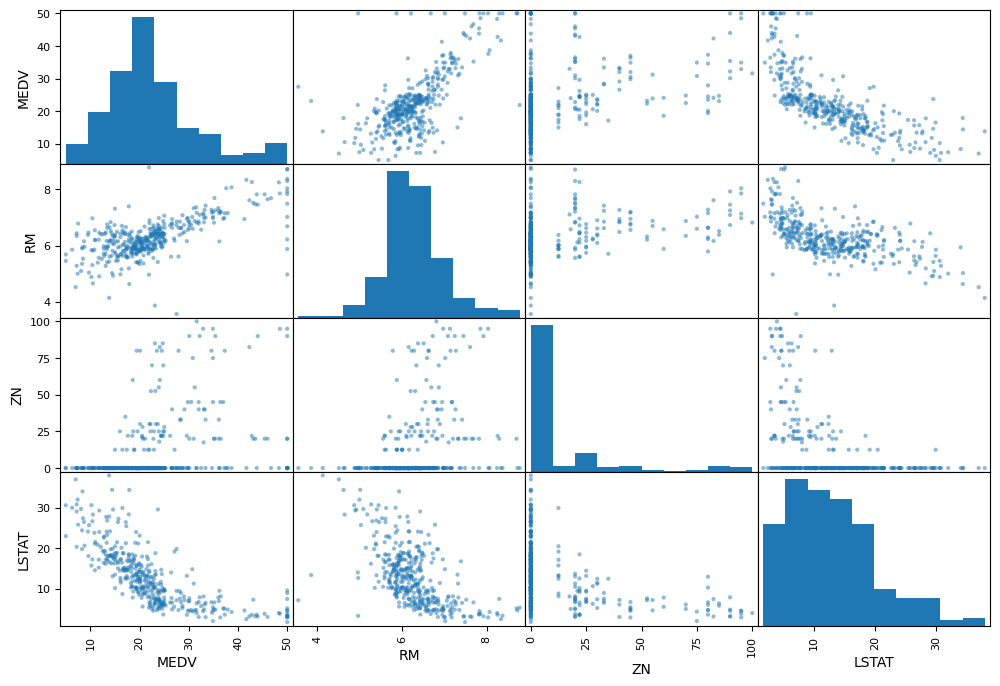

In [29]:
#plotting the strong correlation values
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

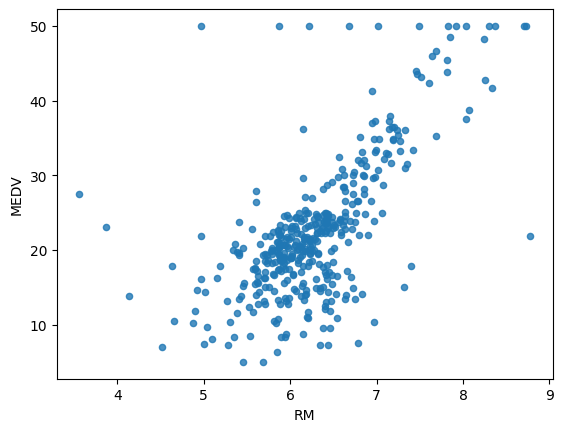

In [30]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [31]:
#Evaluation of the model 
#Prices are capt at 50 no value is more than 50
#we can remove the extra dots coming out so that our model should learn better and give good test results
#how can it be possible that 5 room bed is also 50 and 9 room house is also 50
#this is the benefit of correlation data

# Attributes combination

array([[<Axes: xlabel='TAX', ylabel='TAX'>,
        <Axes: xlabel='RM', ylabel='TAX'>],
       [<Axes: xlabel='TAX', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>]], dtype=object)

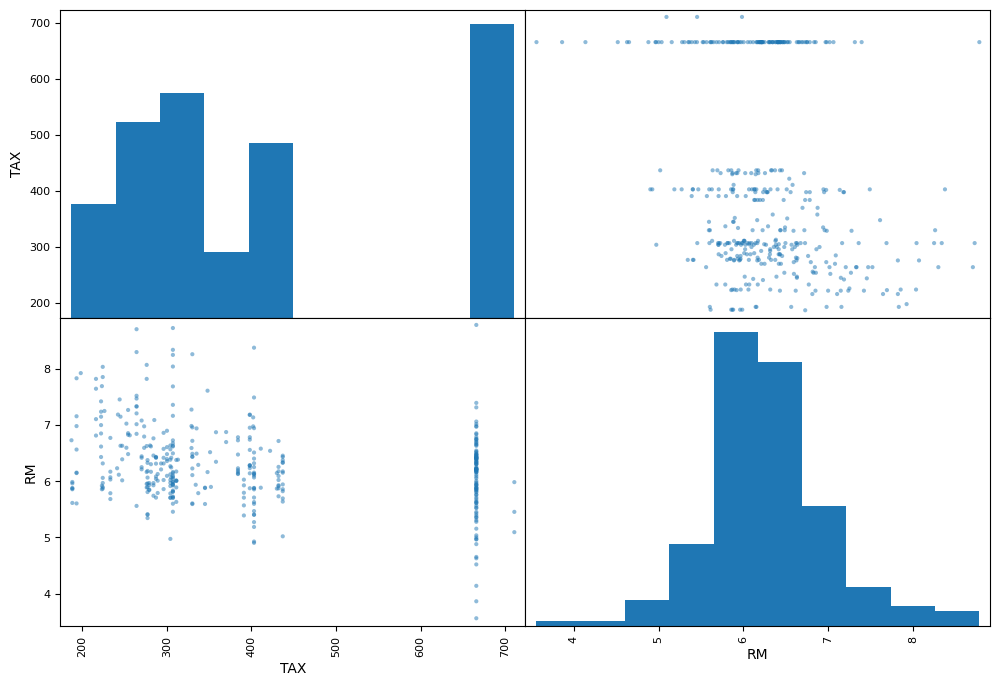

In [32]:
#we can see the tax per room 
attributes1=["TAX","RM"]
scatter_matrix(housing[attributes1],figsize=(12,8))

<Axes: xlabel='TAX', ylabel='RM'>

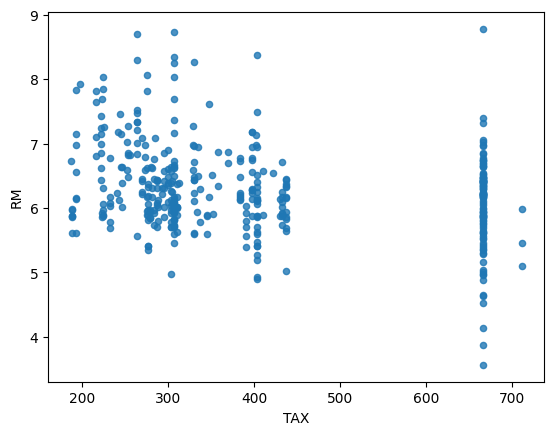

In [33]:
housing.plot(kind="scatter",x="TAX",y="RM",alpha=0.8)

In [34]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [35]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
425,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3,112.957938
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1,47.633971
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6,34.416544
316,0.31827,0.0,9.90,0.0,0.544,5.914,NaN,3.9986,4,304,18.4,390.70,18.33,17.8,51.403449
431,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1,97.468169


In [36]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.669448
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
TAXRM     -0.520217
LSTAT     -0.732270
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

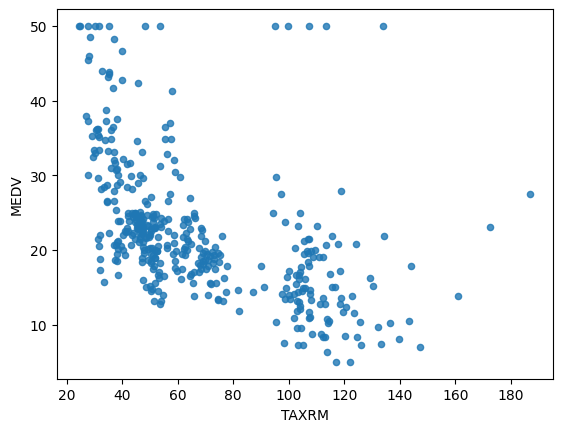

In [37]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)
#strong negative coorelation

In [38]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [39]:
# To tak ecare of the misssing attribues
# 1. Get red of the missing data tables remove the full table with the missing attributed
# 2. Get rid of the whole attribute
# 3. Set the value to some value(0,mean,median)

In [40]:
# a=housing.dropna(subset="RM",axis=1) #method1
# a.shape

In [41]:
# housing.drop("RM",axis=1).shape. #options 2

In [42]:
#median = housing["RM"].median() #option3 #compute median for option3

In [43]:
#housing["RM"].fillna(median)

In [44]:
housing.shape

(404, 13)

In [45]:
housing.describe() #before imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,391.000000,386.000000,388.000000,404.000000,404.000000,404.000000,390.000000,404.000000,404.000000,404.000000,404.000000,404.000000,387.000000
mean,3.813349,10.866580,11.287552,0.066832,0.557777,6.280760,69.593590,3.745757,9.745050,411.539604,18.489109,353.730421,12.887674
std,9.325328,23.017096,6.802350,0.250040,0.116376,0.702466,27.609431,2.095471,8.723025,168.190814,2.135190,95.032131,7.216492
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.089470,0.000000,5.190000,0.000000,0.453000,5.878750,46.400000,2.042200,4.000000,283.250000,17.400000,374.650000,7.130000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.740000
75%,3.675945,12.500000,18.100000,0.000000,0.625750,6.620500,94.250000,5.100400,24.000000,666.000000,20.200000,395.945000,17.115000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([2.83920e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.77500e+01, 3.10730e+00, 5.00000e+00, 3.41000e+02,
       1.91000e+01, 3.90975e+02, 1.17400e+01])

In [48]:
imputer.statistics_.shape

(13,)

In [49]:
X=imputer.transform(housing)

In [50]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [51]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.699779,10.382426,11.232599,0.066832,0.557777,6.280760,69.876238,3.745757,9.745050,411.539604,18.489109,353.730421,12.839381
std,9.194859,22.608913,6.671452,0.250040,0.116376,0.702466,27.166717,2.095471,8.723025,168.190814,2.135190,95.032131,7.066410
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.091487,0.000000,5.725000,0.000000,0.453000,5.878750,47.350000,2.042200,4.000000,283.250000,17.400000,374.650000,7.215000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.740000
75%,3.489463,0.000000,18.100000,0.000000,0.625750,6.620500,94.025000,5.100400,24.000000,666.000000,20.200000,395.945000,16.945000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform) which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict) are two common functions. It also gives score() function which will evaluate the predictions.

Making a pipeline 
Applying the method in which we can change the model and making
different strategies for future employment of the model and 
training onto different dataset


# Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
(value - min)/ (max - min)
Sklearn provides a class called MinMaxScaler for this
2. Standardization (value - mean)/std
Sklearn provides a class called StandardScaler for this

# Creating a pipeline 

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    # ......add as many as you want
    ('std_scalar',StandardScaler())
])

In [53]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)
housing_num_tr.shape

(404, 13)

# Selecting a desired model for babel estate data

Select and Train the model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [58]:
import pandas as pd

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

prepared_data = my_pipeline.transform(some_data)




In [59]:
model.predict(prepared_data)

array([ 8.671, 22.696, 27.727, 17.964, 16.38 ])

In [60]:
list(some_labels)

[8.3, 23.1, 26.6, 17.8, 14.1]

# Evaluating the model

In [61]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [62]:
rmse ##model is overfitted as the error comes as 0.0

1.3136820777818154

#we cant afford the error of 24 instead we use another regression model to minimze the error

# using better evaluation technique - cross validation

In [63]:
#  1 2 3 4 5 6 7 8 9 10 # remove 1 and check remaining 
# #and same as follows   
    

In [64]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores) 

In [65]:
rmse_scores #errros are coming

array([5.22307339, 3.91086038, 2.83684636, 3.0835658 , 6.82437877,
       3.28636914, 2.73766988, 3.71223464, 2.81218325, 2.90911294])

#decision tree regressor is making better predictions as compared to linear regression model

In [66]:
def print_scores(scores):
    print("scores",scores)
    print("Mean :",scores.mean())
    print("Standard deviation: ",scores.std())

In [67]:
print_scores(rmse_scores)

scores [5.22307339 3.91086038 2.83684636 3.0835658  6.82437877 3.28636914
 2.73766988 3.71223464 2.81218325 2.90911294]
Mean : 3.7336294546616196
Standard deviation:  1.2550184711895978


In [68]:
from joblib import dump,load
dump(model,"Babel.joblib")

['Babel.joblib']

# Testing the model data

In [72]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)                           

In [73]:
final_rmse

2.6611145350449386

In [74]:
print(final_predictions)

[33.373  9.772 23.662 29.756 18.363 15.082 19.616 15.212 34.897 31.668
 19.282 11.919 19.358 13.8   21.155 11.909 33.772 14.952 21.492 27.355
 20.086 17.466  9.692 25.018 19.618 23.837 17.568 26.618  8.121 33.405
 21.654 20.69  19.906 11.328 20.31  16.403 33.086 25.12  21.543 20.721
 20.486 45.818 19.848 22.162 18.307 23.957 33.221 20.818 20.994 20.092
 21.322 14.677 24.174 19.69  25.65  22.203 46.955 28.495 18.997 20.633
 27.587  8.59  20.536 43.155 14.47  33.913 48.414 18.321 19.691 31.316
 46.856 23.251 28.449 23.493 47.519 13.922 19.494 22.505 24.057 24.197
 22.274 22.257 13.476 23.462 21.363 21.325 12.296 22.654 22.38  23.277
 18.791 25.923 12.951 23.132 16.389 34.193 19.977 31.64  14.069 25.854
 21.256 21.909]


In [75]:
print(final_predictions,list(Y_test))

[33.373  9.772 23.662 29.756 18.363 15.082 19.616 15.212 34.897 31.668
 19.282 11.919 19.358 13.8   21.155 11.909 33.772 14.952 21.492 27.355
 20.086 17.466  9.692 25.018 19.618 23.837 17.568 26.618  8.121 33.405
 21.654 20.69  19.906 11.328 20.31  16.403 33.086 25.12  21.543 20.721
 20.486 45.818 19.848 22.162 18.307 23.957 33.221 20.818 20.994 20.092
 21.322 14.677 24.174 19.69  25.65  22.203 46.955 28.495 18.997 20.633
 27.587  8.59  20.536 43.155 14.47  33.913 48.414 18.321 19.691 31.316
 46.856 23.251 28.449 23.493 47.519 13.922 19.494 22.505 24.057 24.197
 22.274 22.257 13.476 23.462 21.363 21.325 12.296 22.654 22.38  23.277
 18.791 25.923 12.951 23.132 16.389 34.193 19.977 31.64  14.069 25.854
 21.256 21.909] [32.7, 13.1, 28.7, 26.7, 14.4, 15.6, 19.4, 12.6, 33.3, 32.4, 23.1, 13.8, 22.6, 11.9, 21.1, 11.3, 35.4, 13.5, 21.0, 27.5, 19.2, 19.5, 10.2, 29.4, 18.6, 24.8, 15.2, 24.4, 8.8, 30.3, 22.0, 20.6, 23.1, 13.3, 23.8, 13.8, 33.8, 24.7, 19.4, 20.9, 22.5, 48.8, 22.7, 23.4, 19.5, 26.4

WELL PERFORMED